# Spotify Track Classification 🎵

This project compares Logistic Regression and Random Forest models 
to classify Spotify tracks based on audio features 
(Energy, Danceability, Valence, Tempo).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


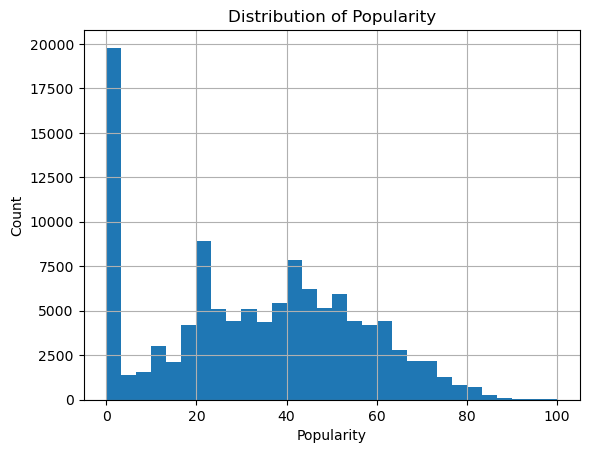

In [5]:
df["popularity"].hist(bins=30)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [6]:
df_high = df[df["popularity"] >= 70]
df_low = df[df["popularity"] <= 20]

print("High popularity songs:", len(df_high))
print("Low popularity songs:", len(df_low))

High popularity songs: 5472
Low popularity songs: 34177


In [7]:
features = ["danceability", "energy", "valence", "tempo"]

print("High popularity mean values:")
print(df_high[features].mean())

print("\nLow popularity mean values:")
print(df_low[features].mean())

High popularity mean values:
danceability      0.616051
energy            0.671062
valence           0.504489
tempo           120.133624
dtype: float64

Low popularity mean values:
danceability      0.572503
energy            0.638269
valence           0.482361
tempo           121.393202
dtype: float64


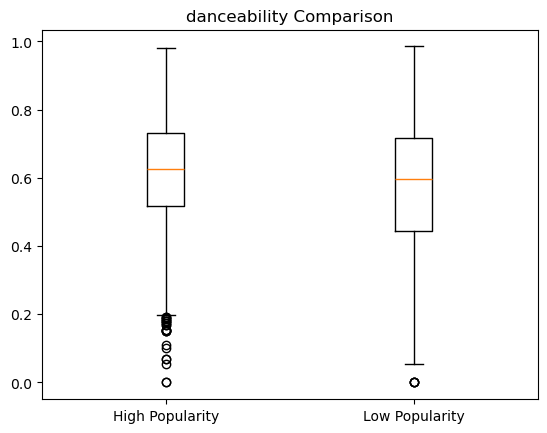

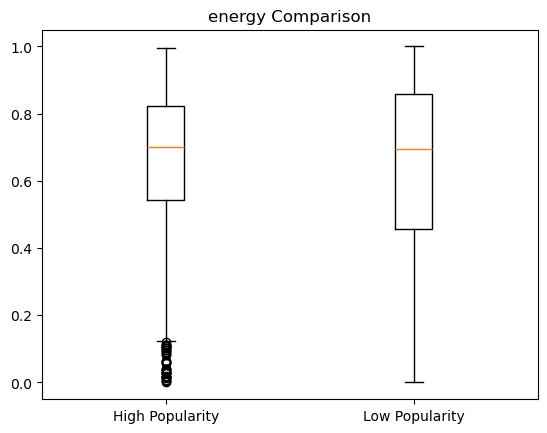

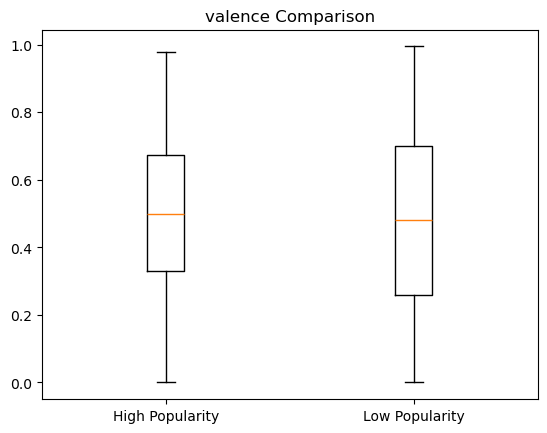

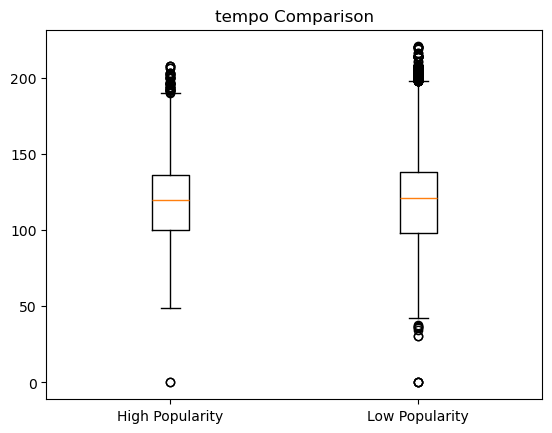

In [8]:
import matplotlib.pyplot as plt

for feature in features:
    plt.figure()
    plt.boxplot([df_high[feature], df_low[feature]])
    plt.xticks([1, 2], ["High Popularity", "Low Popularity"])
    plt.title(f"{feature} Comparison")
    plt.show()

In [9]:
features = ["danceability", "energy", "valence", "tempo"]

summary = pd.DataFrame({
    "High_pop_mean": df_high[features].mean(),
    "Low_pop_mean": df_low[features].mean()
})
summary["Diff(High-Low)"] = summary["High_pop_mean"] - summary["Low_pop_mean"]

summary

,High_pop_mean,Low_pop_mean,Diff(High-Low)
danceability,0.616051,0.572503,0.043548
energy,0.671062,0.638269,0.032794
valence,0.504489,0.482361,0.022128
tempo,120.133624,121.393202,-1.259578


In [10]:
df["is_high_pop"] = (df["popularity"] >= 70).astype(int)
df[["popularity", "is_high_pop"]].head()

,popularity,is_high_pop
0,73,1
1,55,0
2,57,0
3,71,1
4,82,1


In [11]:
features = ["danceability", "energy", "valence", "tempo"]

X = df[features]
y = df["is_high_pop"]

X.head()

,danceability,energy,valence,tempo
0,0.676,0.4610,0.715,87.917
1,0.420,0.1660,0.267,77.489
2,0.438,0.3590,0.120,76.332
3,0.266,0.0596,0.143,181.740
4,0.618,0.4430,0.167,119.949


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)

(91200, 4)
(22800, 4)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9539035087719299


In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[21749,     0],
       [ 1051,     0]])

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5272368421052631
[[11396 10353]
 [  426   625]]


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.52      0.68     21749
           1       0.06      0.59      0.10      1051

    accuracy                           0.53     22800
   macro avg       0.51      0.56      0.39     22800
weighted avg       0.92      0.53      0.65     22800



In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

proba = model.predict_proba(X_test)[:, 1]

for th in [0.5, 0.6, 0.7, 0.8]:
    y_pred_th = (proba >= th).astype(int)
    cm = confusion_matrix(y_test, y_pred_th)
    print("threshold =", th)
    print(cm)
    print()

threshold = 0.5
[[11396 10353]
 [  426   625]]

threshold = 0.6
[[19753  1996]
 [  914   137]]

threshold = 0.7
[[21747     2]
 [ 1051     0]]

threshold = 0.8
[[21749     0]
 [ 1051     0]]



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     21749
           1       0.73      0.62      0.67      1051

    accuracy                           0.97     22800
   macro avg       0.86      0.80      0.83     22800
weighted avg       0.97      0.97      0.97     22800



In [19]:
import pandas as pd

importance = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importance

,feature,importance
1,energy,0.270218
3,tempo,0.250873
2,valence,0.247599
0,danceability,0.231310


## Conclusion

Random Forest achieved higher performance than Logistic Regression.
Energy and Tempo are the most important features in classifying Spotify tracks.
The dataset shows class imbalance, which affects minority class recall.